In [ ]:
pip install keras

In [1]:
import keras

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape


(50000, 32, 32, 3)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


x_train=x_train/225
x_test=x_test/255


In [6]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
print(x_train.shape[1:])

(32, 32, 3)


In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

In [9]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.4)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.5)
model.add(Dense(10,activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [12]:
model.compile(loss='categorical_crossentropy',  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 [==============================] - 124s 157ms/step - loss: 1.2836 - accuracy: 0.5423 - val_loss: 1.0729 - val_accuracy: 0.6186
Epoch 2/10
782/782 [==============================] - 130s 166ms/step - loss: 0.9562 - accuracy: 0.6624 - val_loss: 0.8920 - val_accuracy: 0.6912
Epoch 3/10
782/782 [==============================] - 127s 163ms/step - loss: 0.7864 - accuracy: 0.7273 - val_loss: 0.8151 - val_accuracy: 0.7188
Epoch 4/10
782/782 [==============================] - 126s 162ms/step - loss: 0.6617 - accuracy: 0.7690 - val_loss: 0.7146 - val_accuracy: 0.7512
Epoch 5/10
782/782 [==============================] - 128s 163ms/step - loss: 0.5641 - accuracy: 0.8037 - val_loss: 0.7108 - val_accuracy: 0.7562
Epoch 6/10
782/782 [==============================] - 128s 163ms/step - loss: 0.4877 - accuracy: 0.8310 - val_loss: 0.7175 - val_accuracy: 0.7565
Epoch 7/10
782/782 [==============================] - 128s 164ms/step - loss: 0.4011 - accuracy: 0.8587 - val_loss: 0.7574 -

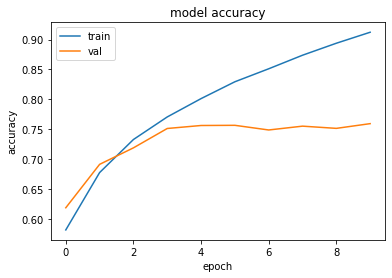

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
